# 读取数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
path = 'data/Metro_train/'
fileList = os.listdir(path) 
abrList = ['record_2019-01-01.csv','record_2019-01-05.csv','record_2019-01-06.csv','record_2019-01-12.csv',
          'record_2019-01-13.csv','record_2019-01-19.csv','record_2019-01-20.csv']
ret_list = [item for item in fileList if item not in abrList]
ret_list = ['record_2019-01-08.csv','record_2019-01-15.csv','record_2019-01-22.csv']

In [3]:
### 1、5、6、12、13、19、20 号的数据与其他数据趋势不一致，剔除
test1 = pd.read_csv('data/Metro_testA/testA_submit_2019-01-29.csv')
test1['hour'] = test1['startTime'].apply(lambda x : x[11:16])
def MeanMethod(test1,ret_list):
    for f in ret_list:
        print('------------开始计算:',f,'----------------')
        df1=pd.read_csv(path+f)
        df1['hour'] = df1['time'].apply(lambda x : x[11:15]+'0')

        df = pd.DataFrame()
        g = df1.groupby(['hour','stationID'])
        df['inCount'] = g['status'].sum()
        df['outCount'] = g['status'].count()-df['inCount']
        df.reset_index(drop=False,inplace=True)
    
        test1 = test1.merge(df,on=['hour','stationID'],how='left')
        test1 = test1.fillna(0)
        test1['inNums'] = test1['inNums']+test1['inCount']
        test1['outNums'] = test1['inNums']+test1['outCount']
        test1 = test1[['stationID','startTime','endTime','inNums','outNums','hour']]
    return test1

In [4]:
test1.head()

,stationID,startTime,endTime,inNums,outNums,hour
0,0,2019-01-29 00:00:00,2019-01-29 00:10:00,NaN,NaN,00:00
1,0,2019-01-29 00:10:00,2019-01-29 00:20:00,NaN,NaN,00:10
2,0,2019-01-29 00:20:00,2019-01-29 00:30:00,NaN,NaN,00:20
3,0,2019-01-29 00:30:00,2019-01-29 00:40:00,NaN,NaN,00:30
4,0,2019-01-29 00:40:00,2019-01-29 00:50:00,NaN,NaN,00:40


In [5]:
test2 = MeanMethod(test1,ret_list)

------------开始计算: record_2019-01-08.csv ----------------
------------开始计算: record_2019-01-15.csv ----------------
------------开始计算: record_2019-01-22.csv ----------------


In [6]:
test2['inNums'] = (test2['inNums']/len(ret_list))

test2['outNums'] = (test2['outNums']/len(ret_list))

test2 = test2[['stationID','startTime','endTime','inNums','outNums']]

In [7]:
test2.to_csv('data/avg_result2.csv',header=True,index=False)

In [10]:
test2.head()

,stationID,startTime,endTime,inNums,outNums
0,0,2019-01-29 00:00:00,2019-01-29 00:10:00,0,0
1,0,2019-01-29 00:10:00,2019-01-29 00:20:00,0,0
2,0,2019-01-29 00:20:00,2019-01-29 00:30:00,0,0
3,0,2019-01-29 00:30:00,2019-01-29 00:40:00,0,0
4,0,2019-01-29 00:40:00,2019-01-29 00:50:00,0,0


In [16]:
df = test2[test2['stationID']==20]

In [19]:
test2.head()

,stationID,startTime,endTime,inNums,outNums
0,0,2019-01-29 00:00:00,2019-01-29 00:10:00,0,0
1,0,2019-01-29 00:10:00,2019-01-29 00:20:00,0,0
2,0,2019-01-29 00:20:00,2019-01-29 00:30:00,0,0
3,0,2019-01-29 00:30:00,2019-01-29 00:40:00,0,0
4,0,2019-01-29 00:40:00,2019-01-29 00:50:00,0,0


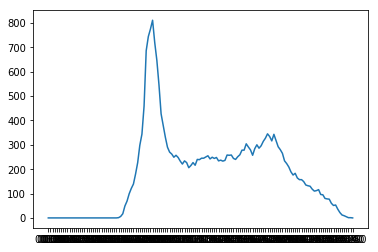

In [17]:
plt.plot(df['hour'],df['inNums'])
plt.show()